###### Some potential questions to consider for car sales dataset analysis could be:

* What is the distribution of car prices, mileage, or other relevant features?
       * Diesel and Petrol cars are the most widely sold Engine Type while Gas and Other fuels are not so commonly used.
       * As the mileage increases, the price tends to decrease. Cars with higher mileage typically have lower market value
       * Petrol vehicles are highly priced as compared to other engine types
       * Gas and Diesel vehicles have the highest mileage
       * Diesel and Petrol cars are the most widely sold Engine Type while Gas and Other fuels are not so commonly used.
* Are there any correlations between car price and other variables like mileage, year of manufacture, or car make/model?
* Are there any outliers or anomalies in the dataset that may need further investigation?
* Can we identify any trends or patterns in car sales based on specific variables?
        * Price of all cars has increased over the period of time. Cars are costing more in recent years.
* Are there any differences in car sales across different brands?
        * Mercedez-Benz is the most expensive brand whereas Renault is the cheapest brand
* Can we predict car prices based on other variables using machine learning techniques?

### Understanding the Dataset

In [3]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)  

from subprocess import check_output

C:\Users\NAUM\AppData\Local\Temp\ipykernel_9128\1731382680.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
# Load the dataset
df = pd.read_csv('car_sales.csv')

# Display the first few rows of the dataset
print(df.head())

           Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4  


In [5]:
# Get information about the dataset
#object - string
#int64 - integer numbers
#float64 - floating point numbers
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None


In [6]:
#display the number of rows and columns
print(df.shape)

(4345, 9)


In [7]:
# Display the column names
print(df.columns)

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')


In [8]:
# Display the data types of each column
print(df.dtypes)

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


In [9]:
# Get summary statistics of numerical columns
print(df.describe())

               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000


In [10]:
# Get unique values in categorical columns
print(df['Brand'].unique())

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']


###### - Categorical Analysis and Visualization

In [11]:
#Find out how many sales were made for each brand
df.Brand.value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

<AxesSubplot:ylabel='Brand'>

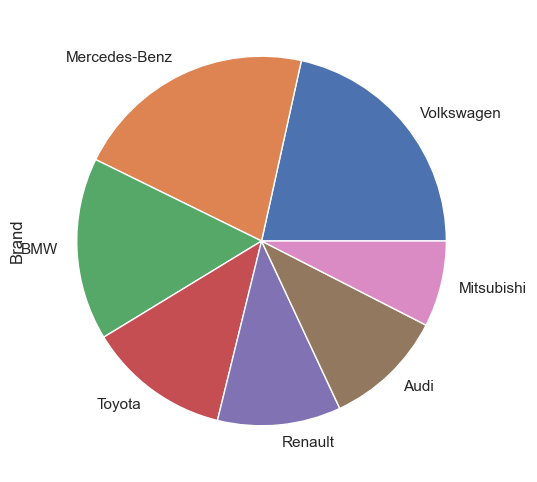

In [12]:
df['Brand'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

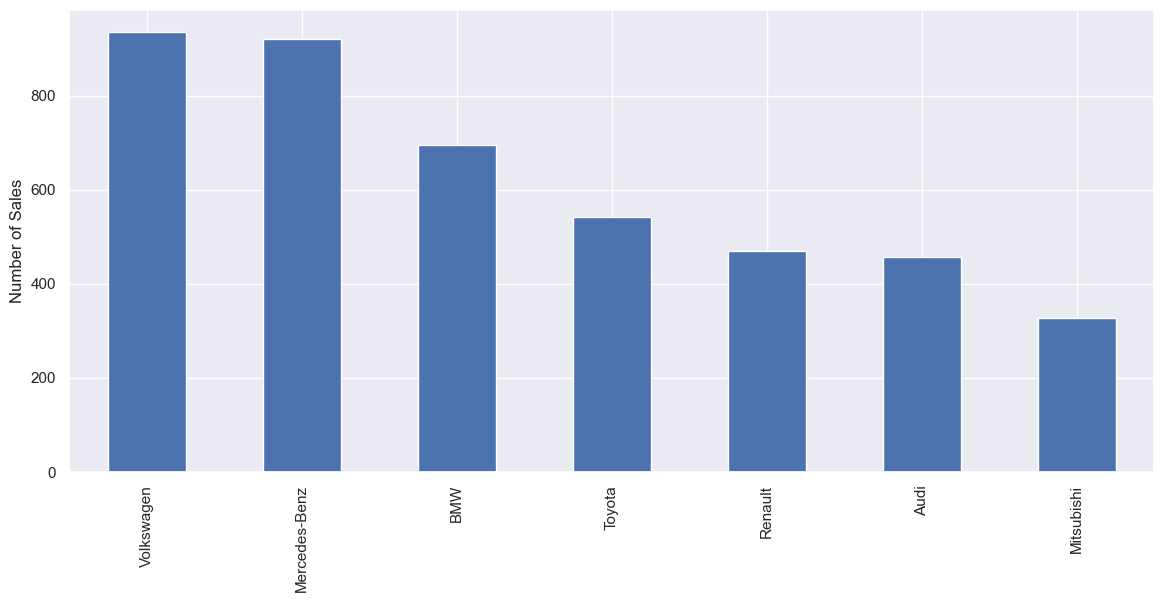

In [13]:
ax=df['Brand'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

<AxesSubplot:title={'center':'Price'}, xlabel='[Brand]'>

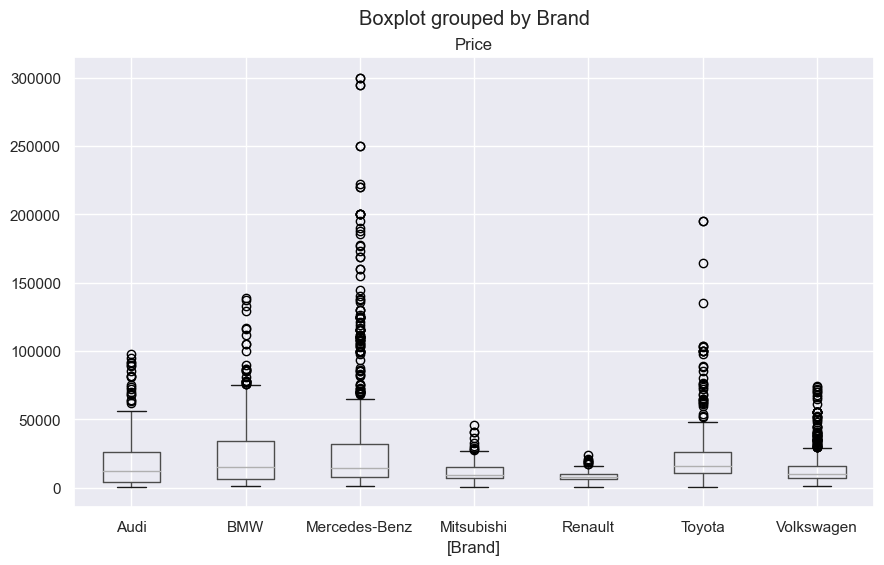

In [14]:
#Show a grouped box plot per brand with the price values
df[['Price','Brand']].boxplot(by='Brand', figsize=(10,6))

In [15]:
#Find out how much revenue each brand brought in
#pd.options.display.float_format = '${:,.2f}'.format
# Filter out null values and get aggregate price statistics
df.loc[df.Price.notnull()].groupby('Brand').Price.agg([sum, min, max,'mean','count'])

,sum,min,max,mean,count
Brand,,,,,
Audi,8172418.00,600.0,98000.00,18489.633484,442
BMW,15738471.25,1400.0,139000.00,23525.368087,669
Mercedes-Benz,26078057.00,1200.0,300000.00,30608.048122,852
Mitsubishi,3648515.30,800.0,46000.00,11295.713003,323
Renault,3664017.92,800.0,24193.65,8035.127018,456
Toyota,11815208.21,600.0,195000.00,22591.220287,523
Volkswagen,11917743.28,1199.0,74500.00,13125.267930,908


In [16]:
#Look at Mercedes-Benz only
df.loc[df.Brand == 'Mercedes-Benz'].sort_values(['Year','Model'],ascending=False)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1037,Mercedes-Benz,47600.0,van,0,2.2,Diesel,yes,2016,Vito
2008,Mercedes-Benz,47600.0,van,0,2.2,Diesel,yes,2016,Vito
2044,Mercedes-Benz,47600.0,van,0,2.2,Diesel,yes,2016,Vito
2763,Mercedes-Benz,47600.0,van,0,2.2,Diesel,yes,2016,Vito
145,Mercedes-Benz,87777.0,van,0,2.2,Diesel,yes,2016,V 250
...,...,...,...,...,...,...,...,...,...
2122,Mercedes-Benz,2990.0,sedan,300,2.8,Gas,yes,1979,S 280
1896,Mercedes-Benz,1950.0,sedan,1,2.0,Diesel,yes,1979,200
1025,Mercedes-Benz,2300.0,sedan,261,2.3,Gas,yes,1978,E-Class
4319,Mercedes-Benz,5500.0,sedan,440,2.0,Petrol,yes,1978,E-Class


In [17]:
#cars that were made before 1990
df.loc[df.Year <1990].sort_values(by='Year')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
810,Mercedes-Benz,34999.0,sedan,150,2.80,Petrol,yes,1969,S 280
4319,Mercedes-Benz,5500.0,sedan,440,2.00,Petrol,yes,1978,E-Class
1025,Mercedes-Benz,2300.0,sedan,261,2.30,Gas,yes,1978,E-Class
2122,Mercedes-Benz,2990.0,sedan,300,2.80,Gas,yes,1979,S 280
1896,Mercedes-Benz,1950.0,sedan,1,2.00,Diesel,yes,1979,200
...,...,...,...,...,...,...,...,...,...
2349,Volkswagen,2400.0,sedan,268,99.99,Petrol,yes,1989,Passat B3
2336,Volkswagen,2700.0,hatch,400,1.80,Gas,yes,1989,Golf II
2160,Volkswagen,2900.0,sedan,2,1.80,Petrol,yes,1989,Passat B3
1479,Volkswagen,3600.0,sedan,320,1.80,Gas,yes,1989,Passat B3


In [18]:
#cars that run on Gas
df.loc[df['Engine Type'] == 'Gas'].sort_values(by='Price',ascending=False)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1736,Mercedes-Benz,60000.0,crossover,140,5.5,Gas,yes,2008,G 55 AMG
3625,Toyota,47700.0,crossover,810,4.7,Gas,yes,2010,Land Cruiser 200
2300,Toyota,45500.0,crossover,65,4.0,Gas,yes,2010,FJ Cruiser
910,Mercedes-Benz,40000.0,crossover,152,5.0,Gas,yes,2006,G 500
1538,Toyota,39900.0,crossover,94,4.0,Gas,yes,2010,Land Cruiser Prado
...,...,...,...,...,...,...,...,...,...
1470,Mitsubishi,NaN,crossover,120,2.0,Gas,yes,2008,Outlander
1660,Toyota,NaN,vagon,160,2.4,Gas,yes,2007,Rav 4
1795,BMW,NaN,sedan,240,2.8,Gas,yes,1997,528
2526,Audi,NaN,sedan,166,3.0,Gas,yes,2005,A6


In [19]:
# The price, mileage, year made and engine types of only Merceds-Benz GL 320
data_filtered = df.loc[(df.Brand == 'Mercedes-Benz') & (df.Model=='GL 320'),['Price', 'Mileage', 'Year', 'Engine Type']]
data_filtered.sort_values(by='Price',ascending=False)

,Price,Mileage,Year,Engine Type
1545,36000.0,162,2009,Diesel
3111,35000.0,154,2008,Diesel
1853,32500.0,254,2008,Diesel
1900,32500.0,168,2009,Diesel
1351,31000.0,220,2008,Diesel
2176,29500.0,180,2008,Diesel
89,28500.0,210,2007,Diesel
1840,28000.0,250,2008,Diesel
3287,27300.0,185,2008,Diesel


In [20]:
# The price, mileage, year made and engine types of only BMW X 5
data_filtered = df.loc[(df.Brand == 'BMW') & (df.Model=='X5'),['Price', 'Mileage', 'Year', 'Engine Type']]
data_filtered.sort_values(by='Price',ascending=False)

,Price,Mileage,Year,Engine Type
3243,104999.0,2,2016,Diesel
2569,104999.0,2,2016,Diesel
3787,75000.0,20,2014,Diesel
1508,71500.0,19,2015,Diesel
3992,69999.0,1,2016,Petrol
...,...,...,...,...
1381,NaN,200,2009,Diesel
2092,NaN,8,2016,Diesel
2992,NaN,0,2016,Diesel
3774,NaN,36,2013,Diesel


In [21]:
#Average Mileage of the cars
data_filtered.Mileage.mean()

133.34453781512605

In [22]:
#Average Price of the cars
data_filtered.Price.mean()

35823.484375

#### Some potential questions to consider for car sales dataset analysis could be:

* What is the distribution of car prices, mileage, or other relevant features?
* Are there any correlations between car price and other variables like mileage, year of manufacture, or car make/model?
* Are there any outliers or anomalies in the dataset that may need further investigation?
* Can we identify any trends or patterns in car sales based on specific variables?
* Are there any differences in car sales across different car makes or models?
* Can we predict car prices based on other variables using machine learning techniques?

### Data Cleaning and Preprocessing

###### 1. a) Handling missing values in 'Price' column

In [23]:
# Check for missing values
print(df.isnull().sum())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

              Total   Percent
Price           172  0.039586
EngineV         150  0.034522
Brand             0  0.000000
Body              0  0.000000
Mileage           0  0.000000
Engine Type       0  0.000000
Registration      0  0.000000
Year              0  0.000000
Model             0  0.000000


In [25]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="carsales_data_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
#fill missing values in the 'Price' column with the mean value
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [27]:
print(df.isnull().sum())

Brand             0
Price             0
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


###### b.) Handling missing values in the 'EngineV' column
* Fill missing values in the "EngineV" column using the corresponding engine values in other vehicles of the same brand, here are the steps followed:

* Identify the missing values in the "EngineV" column.

* Iterate over each missing value and obtain the corresponding brand.

* Filter the dataset to include only the vehicles with the same brand as the one with the missing value.

* Retrieve the engine type values of the filtered dataset.

* If there are non-missing engine type values for the brand, fill the missing value with the most common engine type value for that brand. Otherwise fill it with a default value.

--- Use the imputation approach. More specifically, it can be considered as a brand-specific imputation strategy, where missing values are replaced with values that are specific to the brand of the vehicle.

In [28]:
import pandas as pd

# Identify missing values in the 'EngineV' column
missing_engine_mask = df['EngineV'].isnull()

In [29]:
# Iterate over missing values
for index, row in df[missing_engine_mask].iterrows():
    brand = row['Brand']

    # Filter dataset by brand
    brand_vehicles = df[df['Brand'] == brand]

    # Retrieve non-missing engine type values for the brand
    non_missing_engine_types = brand_vehicles['EngineV'].dropna()

    if non_missing_engine_types.empty:
        # No non-missing values for the brand, handle accordingly
        continue

    # Fill the missing value with the most common engine type value for the brand
    most_common_engine_type = non_missing_engine_types.mode().iloc[0]
    df.loc[index, 'EngineV'] = most_common_engine_type

In [30]:
print(df.isnull().sum())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64


In [31]:
print(df.shape)

(4345, 9)


######  - Add and calculate a new Calculated_Date column

<AxesSubplot:>

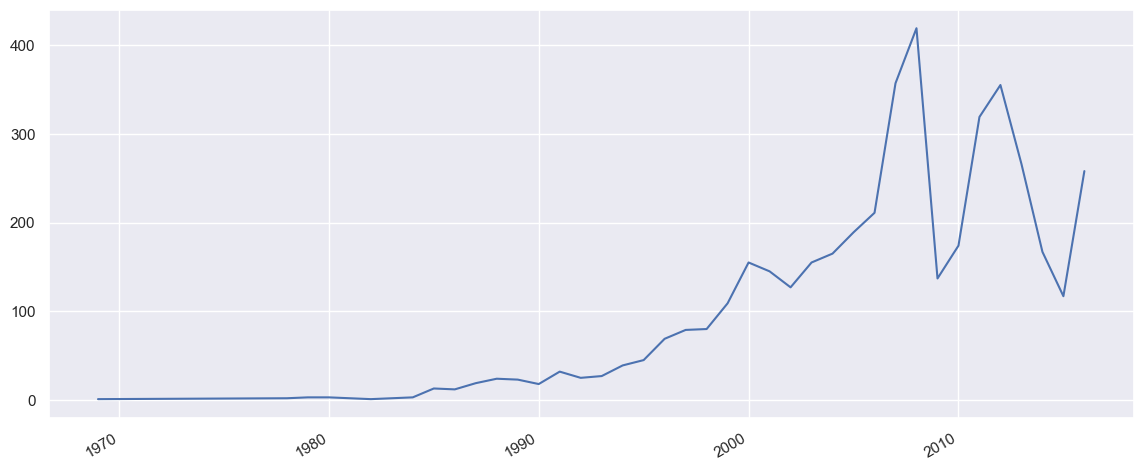

In [32]:
# Use Day, Month, Year to create a Date column (YYYY-MM-DD)
df['Calculated_Date'] = df[['Year']].apply(lambda x: '{}'.format(x[0]), axis=1)

df['Calculated_Date'].head()

df['Calculated_Date'] = pd.to_datetime(df['Calculated_Date'])

df['Calculated_Date'].head()

#How did the sales evolve through the years?
#Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.
df['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [33]:
#Mileage
mileage_avg = sum(df['Mileage']) / len(df['Mileage'])
print(mileage_avg)
df['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in df['Mileage']]
df.loc[:10]

161.2372842347526


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Calculated_Date,mileage_level
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,1991-01-01,high mileage
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,1999-01-01,high mileage
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,2003-01-01,high mileage
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,2007-01-01,high mileage
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,2011-01-01,low mileage
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63,2016-01-01,low mileage
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320,1997-01-01,high mileage
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,2006-01-01,high mileage
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,2012-01-01,high mileage
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV,1999-01-01,high mileage


###### 2.) Remove duplicates

In [34]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
4340    False
4341    False
4342    False
4343    False
4344    False
Length: 4345, dtype: bool


In [35]:
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 73


In [36]:
# Display the duplicated rows
duplicated_rows = df[duplicates]
print(duplicated_rows)

              Brand          Price       Body  Mileage  EngineV Engine Type  \
348   Mercedes-Benz  199999.000000  crossover        0     5.50      Petrol   
371   Mercedes-Benz   19418.746935        van        0     2.20      Diesel   
390   Mercedes-Benz   19418.746935  crossover        0     4.60      Petrol   
602   Mercedes-Benz  199999.000000  crossover        0     5.50      Petrol   
685   Mercedes-Benz   19418.746935        van        0     2.20      Diesel   
...             ...            ...        ...      ...      ...         ...   
4167  Mercedes-Benz   43500.000000      other       51     3.00      Diesel   
4204  Mercedes-Benz   20500.000000      sedan      173     1.80         Gas   
4231  Mercedes-Benz   19418.746935  crossover       27     3.00      Diesel   
4274  Mercedes-Benz  109999.000000  crossover        0     2.98      Diesel   
4311        Renault   10500.000000      vagon      185     1.50      Diesel   

     Registration  Year    Model Calculated_Date mi

In [37]:
# Remove duplicates based on all columns
df.drop_duplicates(inplace=True)

In [38]:
print(df)

              Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      1.6      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model Calculated_Date mileage_level  
0             yes  1991             

In [39]:
print(df.shape)

(4272, 11)


In [40]:
df.describe()

,Price,Mileage,EngineV,Year
count,4272.000000,4272.000000,4272.000000,4272.000000
mean,18956.251230,163.207631,2.767568,2006.419944
std,24326.757431,105.160123,5.020230,6.694256
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.875000,2003.000000
50%,11728.900000,157.000000,2.200000,2008.000000
75%,20625.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [41]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="carsales_data_postprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###### 3.) Dealing with outliers

In [42]:
# Identify potential outliers in 'Price', 'Mileage', and 'EngineV'
#import matplotlib.pyplot as plt

#boxplot_cols=['Price','Mileage','EngineV']

#df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8));

###### - Identify patterns in the data

<AxesSubplot:>

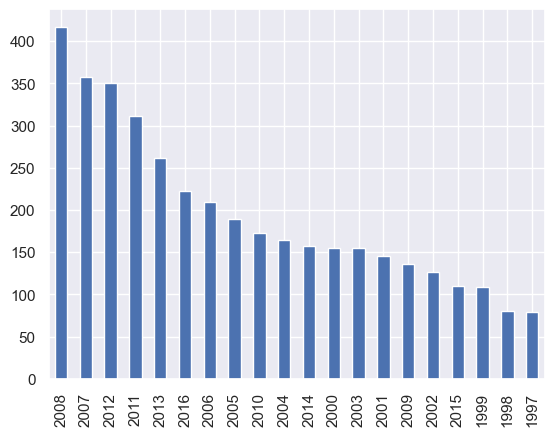

In [43]:
df['Year'].value_counts().head(20).plot.bar()

* Year 2008 has the highest number of car sales record.

<AxesSubplot:xlabel='Body', ylabel='count'>

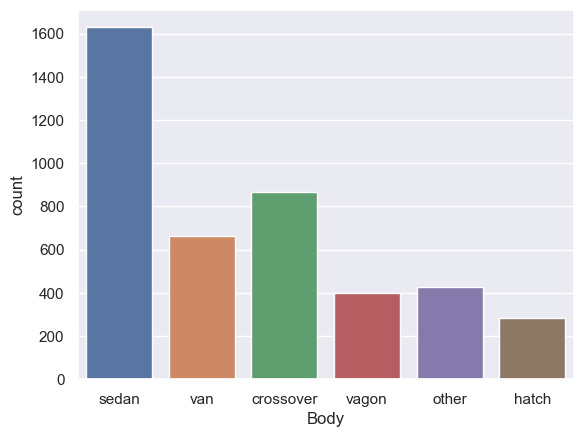

In [48]:
sns.countplot(df['Body'])

* Vehicles with Sedan body are the most preferred

<AxesSubplot:ylabel='Engine Type'>

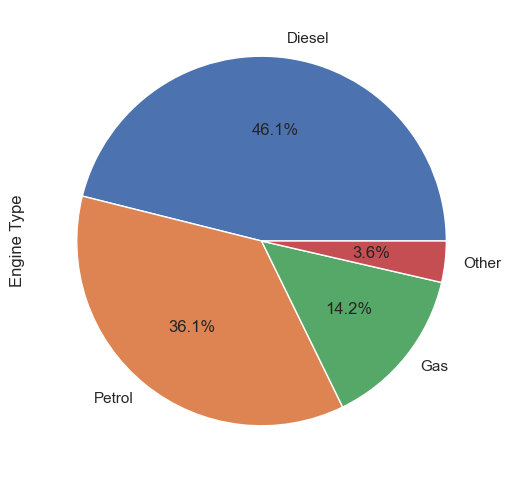

In [52]:
df['Engine Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

* Diesel and Petrol cars are the most widely sold Engine Type while Gas and Other fuels are not so commonly used.

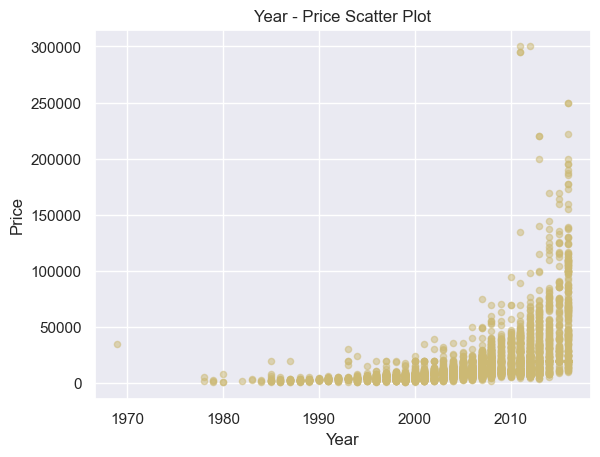

In [53]:
df.plot(kind = 'scatter', x='Year', y = 'Price', alpha = 0.5, color = 'y')
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year - Price Scatter Plot")
plt.show()

* Price of all cars has increased over the period of time. Cars are costing more in recent years.

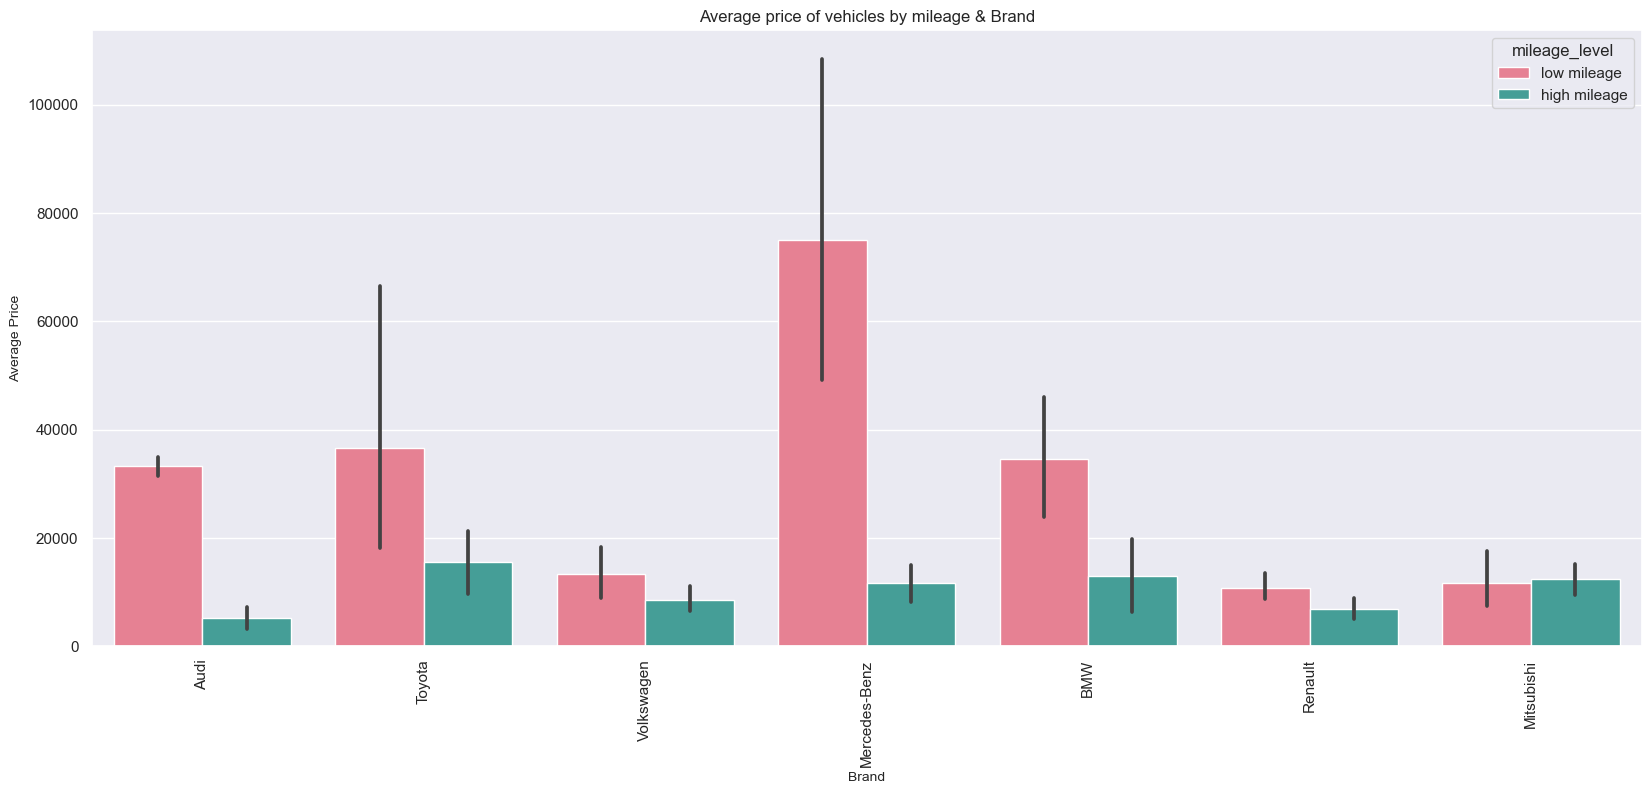

In [55]:
fig, ax = plt.subplots(figsize=(20,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
Carsales_Sample = df.sample(100)
sns.barplot(x="Brand", y="Price", hue= "mileage_level", palette="husl",data=Carsales_Sample)
ax.set_title("Average price of vehicles by mileage & Brand",fontdict= {'size':12})
ax.xaxis.set_label_text("Brand",fontdict= {'size':10})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':10})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

* High mileage cars have a low price while low mileage cars have a high price

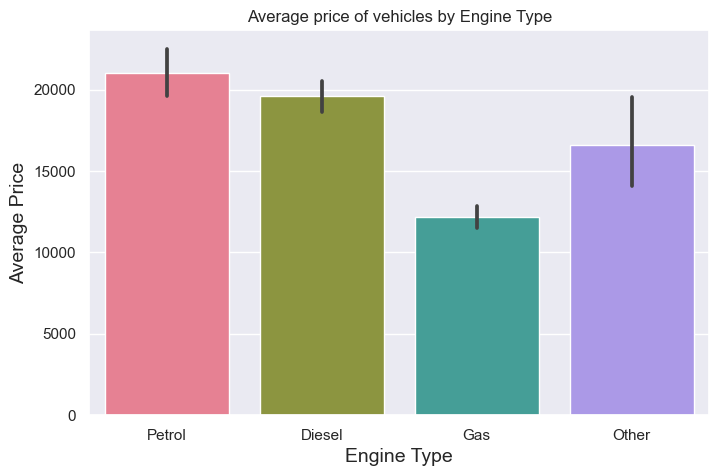

In [57]:
#Average price of vehicle by fuel type

# barplot for price based on fuel type
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Engine Type", y="Price", palette="husl",data=df)
ax.set_title("Average price of vehicles by Engine Type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

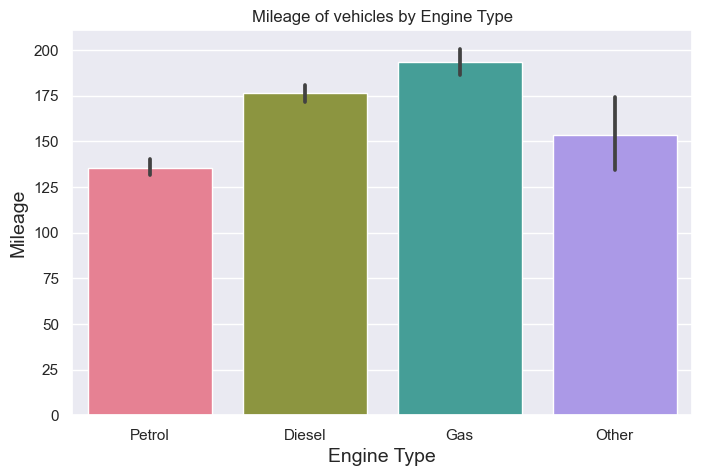

In [58]:
#Average price of vehicle by fuel type

# barplot for price based on fuel type
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Engine Type", y="Mileage", palette="husl",data=df)
ax.set_title("Mileage of vehicles by Engine Type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Mileage",fontdict= {'size':14})
plt.show()

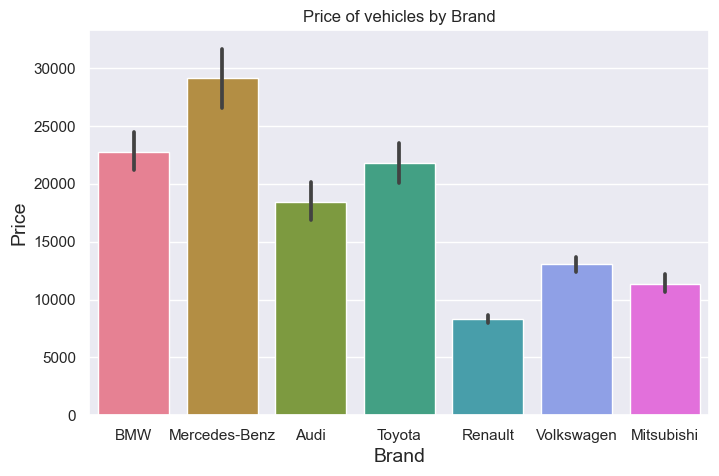

In [66]:
#Average price of vehicle by fuel type

# barplot for price based on fuel type
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Brand", y="Price", palette="husl",data=df)
ax.set_title("Price of vehicles by Brand",fontdict= {'size':12})
ax.xaxis.set_label_text("Brand",fontdict= {'size':14})
ax.yaxis.set_label_text("Price",fontdict= {'size':14})
plt.show()

* Petrol vehicles are highly priced as compared to other engine types
* Gas and Diesel vehicles have the highest mileage 
* Mercedez-Benz is the most expensive brand whereas Renault is the cheapest brand

In [60]:
#correlation
corr =df.corr()
corr

,Price,Mileage,EngineV,Year
Price,1.000000,-0.448170,0.054404,0.474257
Mileage,-0.448170,1.000000,0.022565,-0.661078
EngineV,0.054404,0.022565,1.000000,-0.024379
Year,0.474257,-0.661078,-0.024379,1.000000


<AxesSubplot:>

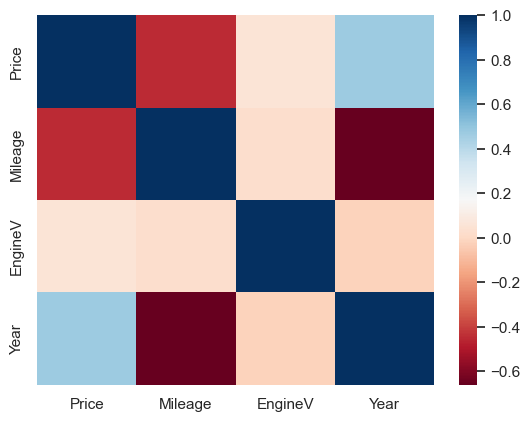

In [62]:
corr = df.loc[:,df.dtypes != 'object'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [63]:
#fig=plt.figure(figsize=(8,8))
#plt.matshow(corr, cmap='RdBu', fignum=fig.number)
#plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
#plt.yticks(range(len(corr.columns)), corr.columns);

###### Interpreting the correlations for each pair of variables:
* Price and Mileage: The correlation coefficient is approximately -0.448. This negative correlation suggests that as the mileage increases, the price tends to decrease. However, the correlation is moderate, indicating that other factors may also influence the price.

* Price and EngineV: The correlation coefficient is approximately 0.054. This positive correlation is weak, indicating that there is only a slight positive relationship between the price and engine volume. Other factors are likely more influential in determining the price.

* Price and Year: The correlation coefficient is approximately 0.474. This positive correlation suggests that as the year of the car increases, the price tends to increase as well. However, the correlation is moderate, indicating that the year alone does not fully explain the variation in prices.

* Mileage and EngineV: The correlation coefficient is approximately 0.022. This positive correlation is very weak, suggesting that there is almost no relationship between the mileage and engine volume.

* Mileage and Year: The correlation coefficient is approximately -0.661. This negative correlation indicates that as the year increases, the mileage tends to decrease. This correlation suggests that newer cars generally have lower mileage, although the correlation is moderate.

* EngineV and Year: The correlation coefficient is approximately -0.024. This correlation is very weak, indicating that there is almost no relationship between the engine volume and the year of the car.

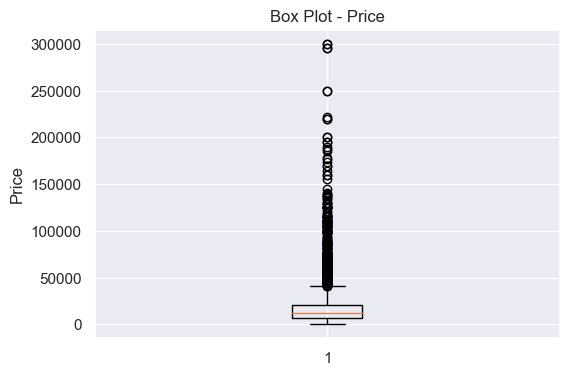

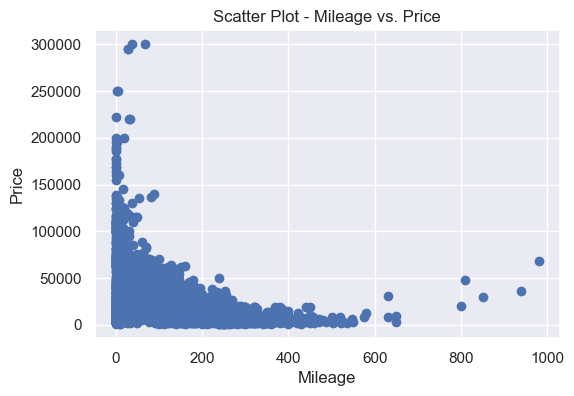

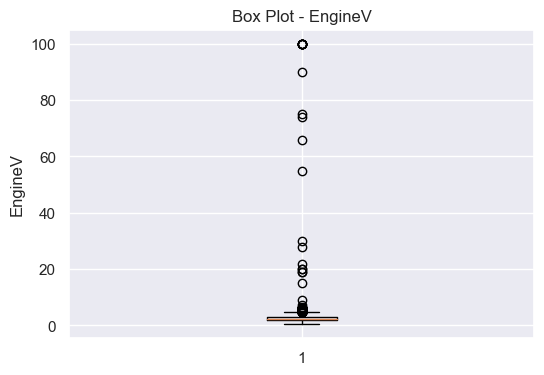

In [44]:
# Visualize the data using box plots and scatter plots
import matplotlib.pyplot as plt

# Box plot for 'Price'
plt.figure(figsize=(6, 4))
plt.boxplot(df['Price'])
plt.title('Box Plot - Price')
plt.ylabel('Price')
plt.show()

# Scatter plot for 'Mileage' and 'Price'
plt.figure(figsize=(6, 4))
plt.scatter(df['Mileage'], df['Price'])
plt.title('Scatter Plot - Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Box plot for 'EngineV'
plt.figure(figsize=(6, 4))
plt.boxplot(df['EngineV'])
plt.title('Box Plot - EngineV')
plt.ylabel('EngineV')
plt.show()

* Inverse relationship between Mileage and Price. As the mileage increases, the price tends to decrease. 
* This is expected as cars with higher mileage typically have lower market value.
* Outliers: unusual or exceptional cases where the relationship between mileage and price deviates from the general trend. i.e cars with higher mileage typically have lower market value

In [65]:
# Calculate the current year
current_year = 2023  # Replace with the actual current year

# Create a new variable 'Age' by subtracting the 'Year' of manufacture from the current year
df['Age'] = current_year - df['Year']
print(df['Age'])

0       32
1       24
2       20
3       16
4       12
        ..
4340     9
4341    24
4342    38
4343     9
4344    10
Name: Age, Length: 4272, dtype: int64


* Subtract the 'Year' column, representing the year of manufacture, from the current year to calculate the age of the cars. This transformation creates a new variable named 'Age' that represents the age of each car in the dataset